In [1]:
#Going to see if there is a linear relationship between combine data and draft pick
#Got data from 2000-2020 nfl combines

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#2000-2017 data from here- https://www.kaggle.com/savvastj/nfl-combine-data
#2018-2020 data from here- https://www.pro-football-reference.com/play-index/nfl-combine-results.cgi?request=1&year_min=2018&year_max=2020&height_min=65&height_max=82&weight_min=140&weight_max=400&pos%5B%5D=QB&pos%5B%5D=WR&pos%5B%5D=TE&pos%5B%5D=RB&pos%5B%5D=FB&pos%5B%5D=OL&pos%5B%5D=OT&pos%5B%5D=OG&pos%5B%5D=C&pos%5B%5D=DE&pos%5B%5D=DT&pos%5B%5D=DL&pos%5B%5D=EDGE&pos%5B%5D=ILB&pos%5B%5D=OLB&pos%5B%5D=LB&pos%5B%5D=SS&pos%5B%5D=FS&pos%5B%5D=S&pos%5B%5D=CB&pos%5B%5D=LS&pos%5B%5D=K&pos%5B%5D=P&show=all&order_by=year_id

combine_data = pd.read_csv("combine_data_2000_2020.csv", encoding= 'unicode_escape')
combine_data.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1.0,23.0


In [3]:
#determine what percent of each column is filled with NaN values
combine_data.isnull().sum() / combine_data.shape[0]

Player       0.000000
Pos          0.000000
Ht           0.000000
Wt           0.000000
Forty        0.045995
Vertical     0.229251
BenchReps    0.320226
BroadJump    0.236941
Cone         0.368979
Shuttle      0.356355
Year         0.054991
Team         0.366077
Round        0.366077
Pick         0.366077
dtype: float64

In [4]:
#going to remove undrafted players because that could skew the data since over 36% of the players were undrafted
drafted_players = combine_data.dropna(subset = ["Round"])
drafted_players.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6.0,188.0
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1.0,23.0
6,LaVar Arrington,OLB,75,250,4.53,NaN,NaN,NaN,NaN,NaN,2000,Washington Redskins,1.0,2.0


In [5]:
#check to see what percent of columns are NaNs
drafted_players.isnull().sum() / drafted_players.shape[0]

#Vert, Bench, Broad, Cone, and Shuttle all have a solid amount of NaNs

Player       0.000000
Pos          0.000000
Ht           0.000000
Wt           0.000000
Forty        0.040742
Vertical     0.217670
BenchReps    0.304417
BroadJump    0.225910
Cone         0.357748
Shuttle      0.346532
Year         0.000000
Team         0.000000
Round        0.000000
Pick         0.000000
dtype: float64

In [6]:
#get rid of spaces in year column and change to integer
drafted_players['Year'] = drafted_players.Year.str.strip()
drafted_players['Year'] = pd.to_numeric(drafted_players['Year'])

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eric.feldhake\Anaconda1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#look at the different positions to group or ignore

list(drafted_players.Pos.unique())

['OLB',
 'RB',
 'OT',
 'CB',
 'FS',
 'TE',
 'OG',
 'ILB',
 'SS',
 'QB',
 'EDGE',
 'WR',
 'DT',
 'FB',
 'K',
 'P',
 'C',
 'LS',
 'LB',
 'C ',
 'S']

In [8]:
#get rid of special teams positions that were drafted
drafted_off_def = drafted_players.loc[~((drafted_players.Pos == 'K') | (drafted_players.Pos == 'P') |\
                                                                      (drafted_players.Pos == 'LS'))]
drafted_off_def.Pos.unique()

array(['OLB', 'RB', 'OT', 'CB', 'FS', 'TE', 'OG', 'ILB', 'SS', 'QB',
       'EDGE', 'WR', 'DT', 'FB', 'C', 'LB', 'C ', 'S'], dtype=object)

In [9]:
#strip space from center Pos and then check what positions are left
drafted_off_def['Pos'] = drafted_off_def['Pos'].str.strip()
drafted_off_def.Pos.unique()

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['OLB', 'RB', 'OT', 'CB', 'FS', 'TE', 'OG', 'ILB', 'SS', 'QB',
       'EDGE', 'WR', 'DT', 'FB', 'C', 'LB', 'S'], dtype=object)

In [10]:
#goal with these for loops is to fill in missing data for players who did not complete certain combine events
#going to group each player by their respective position and randomly assign a number for that event
                                #within one standard deviation of the mean of that event for that position group

#create list of all the different positions
positions = list(drafted_off_def.Pos.unique())

#create empty dict of all the positions
position_dict = {elem : pd.DataFrame() for elem in positions}

for key in position_dict.keys():
    position_dict[key] = drafted_off_def[:][drafted_off_def.Pos == key]
    
    #iterate over the list of dataframes
    #first create a list of dfs
    
    df_list = []
    
    for key, value in position_dict.items():
        
        df_list.append(value)

In [11]:
#iterate over each df in the list of dfs
for df in df_list:

#for loop to fill in missing data with random numbers based on range of other players at their position
    for column in df[['Forty','Vertical','BenchReps','BroadJump','Cone','Shuttle']]:

        #create range for blank bench
        mean = df[column].mean()
        std = df[column].std()
        low = mean - std
        high = mean + std

        #create random benches based on missing values
        missing = df[column].isnull().sum()
        random = np.random.uniform(low, high, size = missing)

        #apply to missing values
        df[column][np.isnan(df[column])] = random

In [12]:
#check shape of original dataframe of all drafted off or def players to see if it's same as the new filled one
drafted_off_def.shape

(4297, 14)

In [13]:
#confirm with shape of updated dfs
drafted_off_def_filled = pd.concat(df_list, axis = 0)
drafted_off_def_filled.shape

#it works

(4297, 14)

In [14]:
#confirm all rows are filled
drafted_off_def_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4297 entries, 0 to 6874
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     4297 non-null   object 
 1   Pos        4297 non-null   object 
 2   Ht         4297 non-null   int64  
 3   Wt         4297 non-null   int64  
 4   Forty      4297 non-null   float64
 5   Vertical   4297 non-null   float64
 6   BenchReps  4297 non-null   float64
 7   BroadJump  4297 non-null   float64
 8   Cone       4297 non-null   float64
 9   Shuttle    4297 non-null   float64
 10  Year       4297 non-null   int64  
 11  Team       4297 non-null   object 
 12  Round      4297 non-null   float64
 13  Pick       4297 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 503.6+ KB


In [15]:
#going to slice dataframes to just the ht, wt, combine data columns, and pick
#going to then do a heatmap and then run MLR

dfs_numeric = []
for df in df_list:
    
    dfs_numeric.append(df[["Pos","Ht","Wt","Forty","Vertical","BenchReps","BroadJump","Cone","Shuttle","Pick"]])
    
#need to add a constant for OLS in statsmodel to estimate the y-intercept (beta)
for df in dfs_numeric:
    df['constant']= 1

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#Key
    #0 - OLB
    #1 - RB
    #2 - OT
    #3 - CB
    #4 - FS
    #5 - TE
    #6 - OG
    #7 - ILB
    #8 - SS
    #9 - QB
    #10 - EDGE
    #11 - WR
    #12 - DT
    #13 - FB
    #14 - C
    #15 - LB
    #16 - S

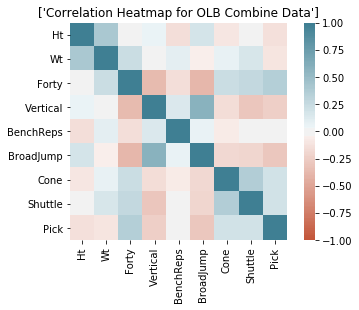

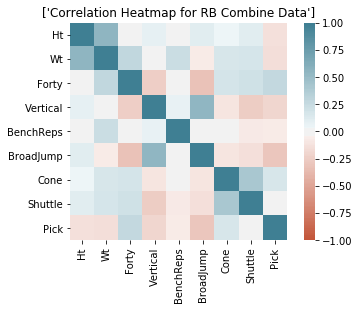

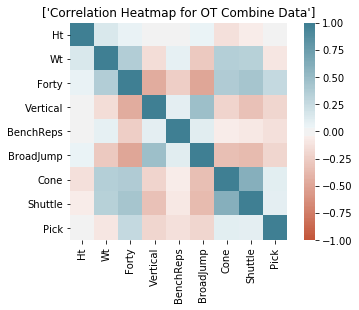

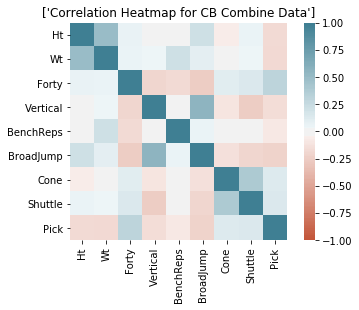

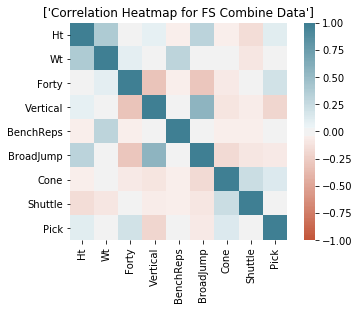

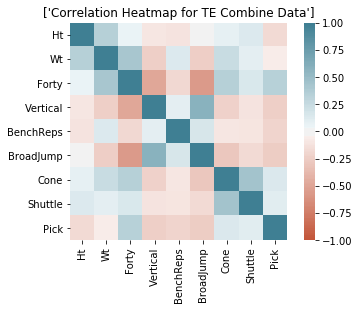

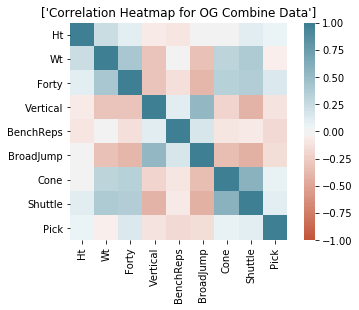

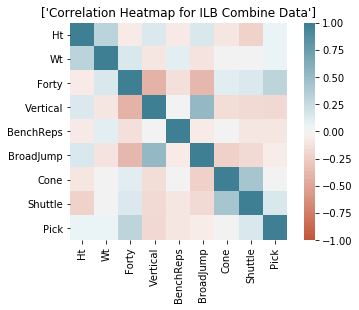

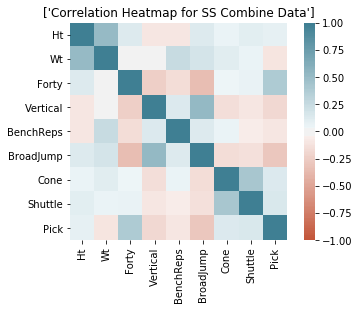

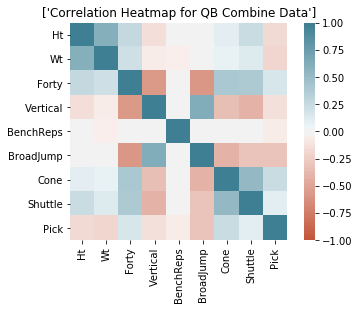

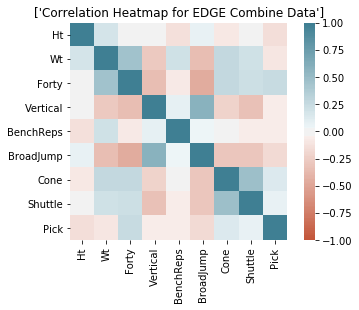

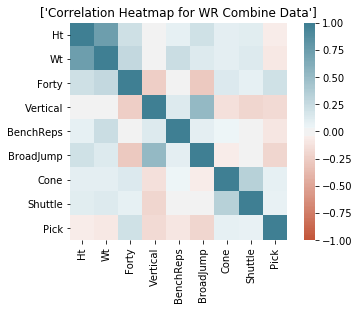

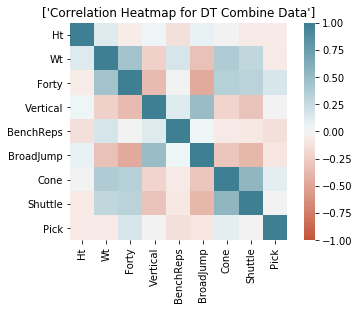

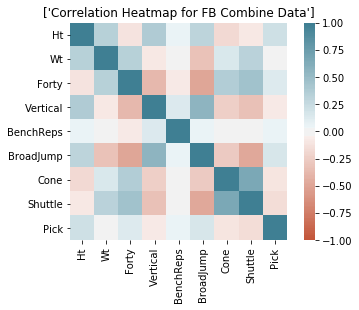

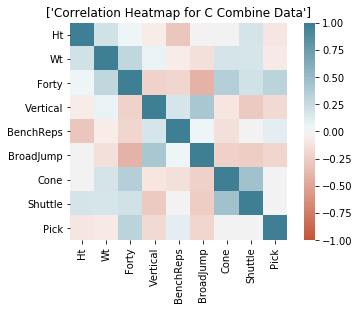

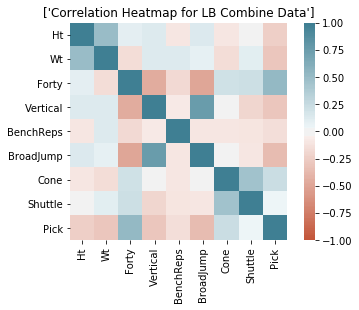

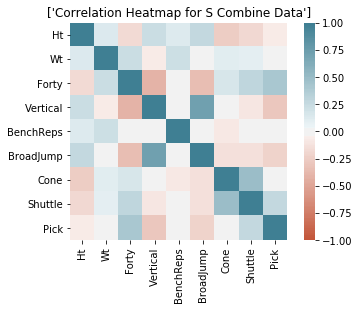

In [16]:
#going to create a heatmap for each dataframe of positions to check multicollinearity

#import seaborn for heatmap
import seaborn as sns
import matplotlib.pyplot as plt

for df in dfs_numeric:
    plt.figure()
    title = "Correlation Heatmap for " + df.Pos.unique() + " Combine Data"
    sns.heatmap(df[["Ht","Wt","Forty","Vertical","BenchReps","BroadJump","Cone","Shuttle","Pick"]].corr(), \
                vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n=200), square = True).set_title(title)

In [ ]:
#None of the Positions seem to have any column that is highly correlated with Pick #

#In terms of multicollinearity among the independent variables, HT and WT are obviously related #
#and cone and shuttle in some cases are related 


['OLB']

                            OLS Regression Results                            
Dep. Variable:                   Pick   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     8.410
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           6.13e-10
Time:                        14:32:33   Log-Likelihood:                -1250.8
No. Observations:                 226   AIC:                             2520.
Df Residuals:                     217   BIC:                             2550.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ht            -0.5462      3.238     -0.16


['FS']

                            OLS Regression Results                            
Dep. Variable:                   Pick   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2.405
Date:                Mon, 06 Jul 2020   Prob (F-statistic):             0.0208
Time:                        14:32:34   Log-Likelihood:                -571.48
No. Observations:                 104   AIC:                             1161.
Df Residuals:                      95   BIC:                             1185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ht             9.7178      5.507      1.765


['SS']

                            OLS Regression Results                            
Dep. Variable:                   Pick   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3.361
Date:                Mon, 06 Jul 2020   Prob (F-statistic):            0.00209
Time:                        14:32:34   Log-Likelihood:                -542.48
No. Observations:                  97   AIC:                             1103.
Df Residuals:                      88   BIC:                             1126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ht             6.9790      5.209      1.340

strong multicollinearity or other numerical problems.

Ht              1.083459
Wt              1.507763
Forty           1.533585
Vertical        1.429235
BenchReps       1.126683
BroadJump       1.622382
Cone            1.573600
Shuttle         1.576691
constant     7464.739560
dtype: float64

  RMSE:  68.78072323377503

['FB']

                            OLS Regression Results                            
Dep. Variable:                   Pick   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1.682
Date:                Mon, 06 Jul 2020   Prob (F-statistic):              0.136
Time:                        14:32:35   Log-Likelihood:                -238.38
No. Observations:                  46   AIC:                             494.8
Df Residuals:                      37   BIC:                             511.2
Df Model:                           


['S']

                            OLS Regression Results                            
Dep. Variable:                   Pick   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     1.621
Date:                Mon, 06 Jul 2020   Prob (F-statistic):              0.167
Time:                        14:32:35   Log-Likelihood:                -184.69
No. Observations:                  35   AIC:                             387.4
Df Residuals:                      26   BIC:                             401.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ht             4.1014      7.437      0.552 

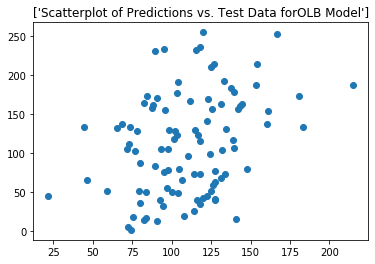

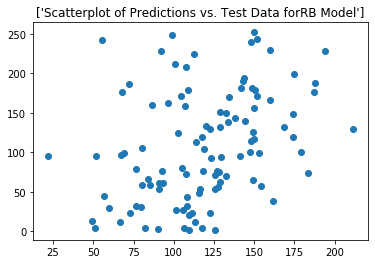

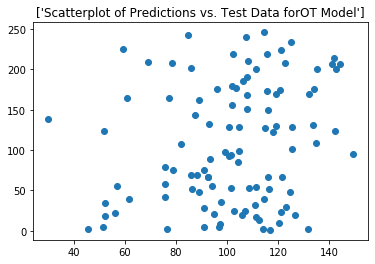

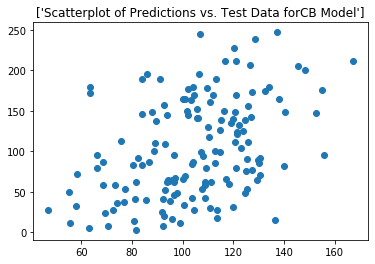

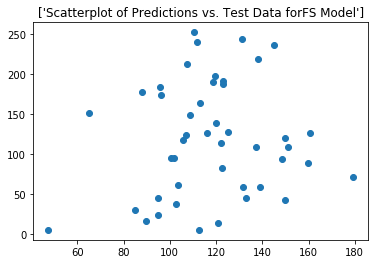

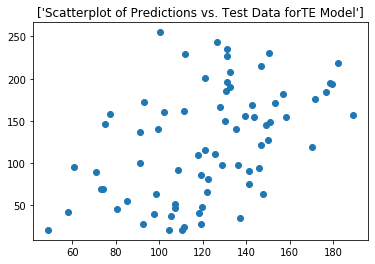

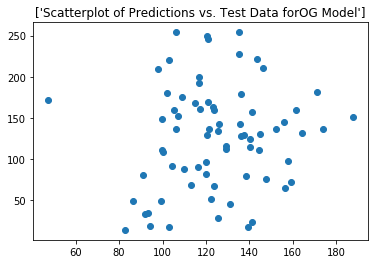

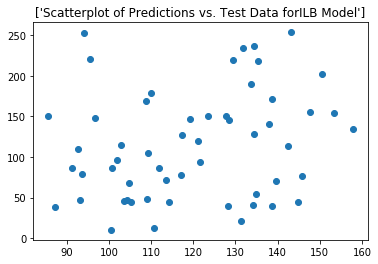

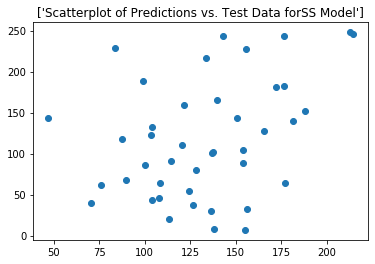

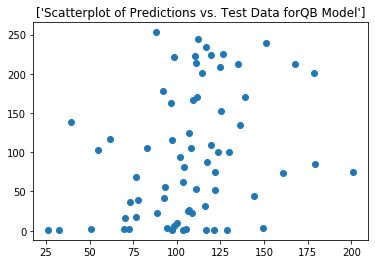

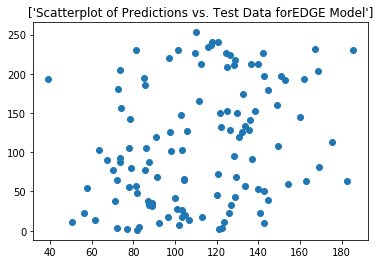

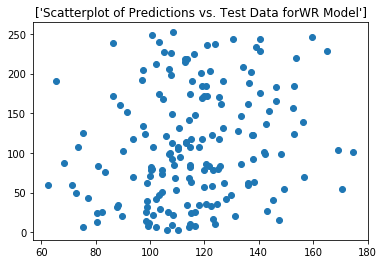

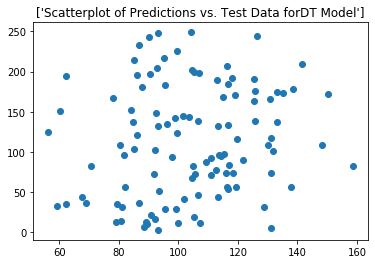

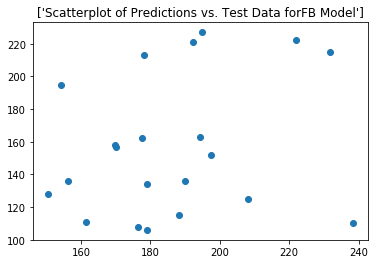

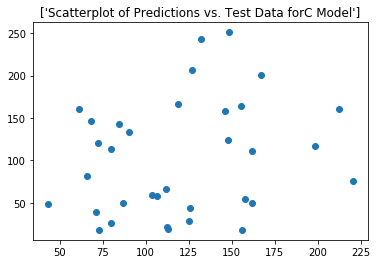

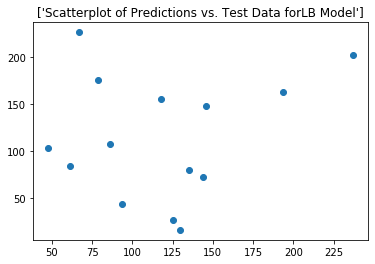

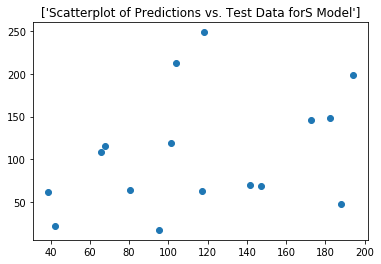

In [18]:
#use stats models and for loop to run OLS for each of the 17 position groups

#import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

for df in dfs_numeric:
    X = df[["Ht","Wt","Forty","Vertical","BenchReps","BroadJump","Cone","Shuttle","constant"]]
    y = df["Pick"]

    #create the training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    #fit the line with statsmodel package and then summarize it with a nice little output of stats
    reg = sm.OLS(y_train, X_train).fit()
    
    #generate the predictions that the model predicts with the test data
    y_hat = reg.predict(X_test)

    #get the RMSE using the predictions vs. the actual y values of the test data
    rmse = math.sqrt(mean_squared_error(y_hat,y_test))
    
    print()
    
    #printing the Position being modeled
    print(df.Pos.unique())
    print()
    
    #printing the model summary
    print(reg.summary())
    print()
    
    #printing the VIF for each independent variable which shows multicollinearity
    print(pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns))
    print()
    
    #printing the RMSE which is a good indicator of the error in the model
    print('\033[1m  RMSE:  \033[0m' + str(rmse))
    
    #going to plot the predictions vs. what actually happened in the test dataset for each model
    #set scatter plot for each model
    plt.figure()
    title = "Scatterplot of Predictions vs. Test Data for " + df.Pos.unique() + " Model"
    plt.scatter(y_hat,y_test)
    plt.title(title)

In [ ]:
#Adj r-squared is more applicable for multiple independent variables/MLS because it represents simplicity
#adj r-squared goes down as you get more ind variables

#Want f-stat and prob(omnibus) to be 0 --> suggests model as a whole is significant
#want prob(JB) to be 0, numbers above zero suggest non-linearity
#coef of constant is the coeff of the equation
#Want the VIF (printed at the bottom of each printout) for each independent variable to be < 4, constant doesn't matter
#VIF numbers above 4 suggest multicollinearity

In [ ]:
#Only LB has a respectable R^2 and that only has 3 years of data and still only has 3 significant independent variables

#Going to group LB, ILB, and OLB together
#Going to group S, FS, SS, and CB together
#Going to group DT and Edge together
#Going to group OG, OT, and C together
#Going to group RB and FB together
#Going to group WR and TE together

#going to rerun with these groups and see if any of these produce respectable models

In [34]:
#adding constant to concatenated df
drafted_off_def_filled['constant'] = 1

#filter out qb
no_qb = drafted_off_def_filled.loc[drafted_off_def_filled.Pos != 'QB']

#create a new column to for the groups I created above

conditions = [
    (no_qb.Pos == 'LB') | (no_qb.Pos == 'OLB') | (no_qb.Pos == 'ILB'),
    (no_qb.Pos == 'S') | (no_qb.Pos == 'FS') | (no_qb.Pos == 'SS') | (no_qb.Pos == 'CB'),
    (no_qb.Pos == 'DT') | (no_qb.Pos == 'EDGE'),
    (no_qb.Pos == 'OT') | (no_qb.Pos == 'OG') | (no_qb.Pos == 'C'),
    (no_qb.Pos == 'RB') | (no_qb.Pos == 'FB'),
    (no_qb.Pos == 'WR') | (no_qb.Pos == 'TE')]
choices = ["Linebacker","Defensive_Back","Defensive_Line","Offensive_Line","Back","Receiver"]
no_qb["group"] = np.select(conditions, choices, default = None)
no_qb.head()

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Team,Round,Pick,group,constant
0,John Abraham,OLB,76,252,4.55,37.123955,25.697343,120.665193,7.034504,4.280769,2000,New York Jets,1.0,13.0,Linebacker,1
6,LaVar Arrington,OLB,75,250,4.53,36.018710,20.310926,112.938370,7.043924,4.131324,2000,Washington Redskins,1.0,2.0,Linebacker,1
37,Keith Bulluck,OLB,75,244,4.47,38.000000,21.753291,119.000000,7.330000,4.130000,2000,Tennessee Titans,1.0,30.0,Linebacker,1
79,Na'il Diggs,OLB,76,231,4.66,35.767126,21.968090,114.110267,6.949330,4.388887,2000,Green Bay Packers,4.0,98.0,Linebacker,1
106,Kabeer Gbaja-Biamila,OLB,76,243,4.65,34.000000,21.000000,120.000000,6.900000,4.280000,2000,Green Bay Packers,5.0,149.0,Linebacker,1


In [35]:
#create list of all the different groups

groups = list(no_qb.group.unique())

#create empty dict of all the positions
group_dict = {elem : pd.DataFrame() for elem in groups}

for key in group_dict.keys():
    group_dict[key] = no_qb[:][no_qb['group'] == key]
    
    #iterate over the list of dataframes
    #first create a list of dfs
    
    df_groups = []
    
    for key, value in group_dict.items():
        
        df_groups.append(value)


['Linebacker']

                            OLS Regression Results                            
Dep. Variable:                   Pick   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     10.08
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           9.16e-13
Time:                        17:00:58   Log-Likelihood:                -2148.3
No. Observations:                 387   AIC:                             4315.
Df Residuals:                     378   BIC:                             4350.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ht             1.0819      2.563   

strong multicollinearity or other numerical problems.

Ht              1.145370
Wt              3.570208
Forty           2.868906
Vertical        2.305771
BenchReps       1.285855
BroadJump       3.274540
Cone            2.690058
Shuttle         2.301733
constant     7337.208369
dtype: float64

  RMSE:  68.59649243694776


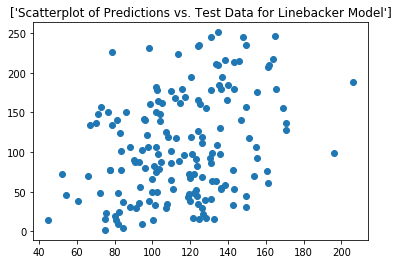

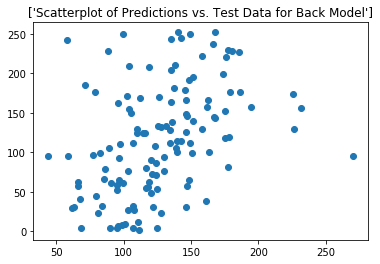

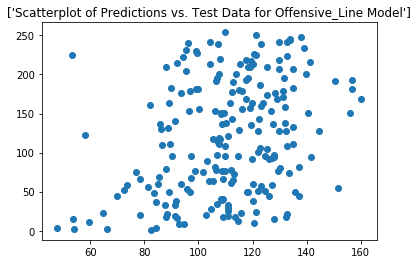

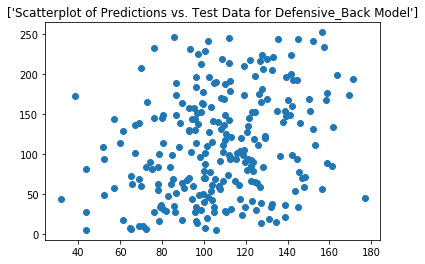

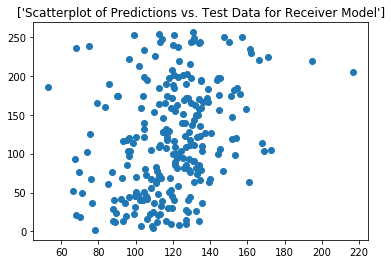

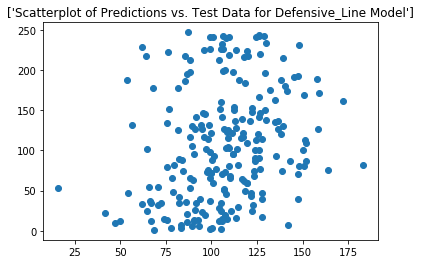

In [36]:
#going to run models for the 6 groups I identified: LB, DB, OL, DL, Backs, and Receivers

for df in df_groups:
    X = df[["Ht","Wt","Forty","Vertical","BenchReps","BroadJump","Cone","Shuttle","constant"]]
    y = df["Pick"]

    #create the training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    #fit the line with statsmodel package and then summarize it with a nice little output of stats
    reg = sm.OLS(y_train, X_train).fit()
    
    #generate the predictions that the model predicts with the test data
    y_hat = reg.predict(X_test)

    #get the RMSE using the predictions vs. the actual y values of the test data
    rmse = math.sqrt(mean_squared_error(y_hat,y_test))
    
    print()
    
    #printing the Position being modeled
    print(df.group.unique())
    print()
    
    #printing the model summary
    print(reg.summary())
    print()
    
    #printing the VIF for each independent variable which shows multicollinearity
    print(pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns))
    print()
    
    #printing the RMSE which is a good indicator of the error in the model
    print('\033[1m  RMSE:  \033[0m' + str(rmse))
    
    #going to plot the predictions vs. what actually happened in the test dataset for each model
    #set scatter plot for each model
    plt.figure()
    title = "Scatterplot of Predictions vs. Test Data for " + df.group.unique() + " Model"
    plt.scatter(y_hat,y_test)
    plt.title(title)

In [ ]:
#All the models are still poor with running backs being the only position with R^2 over .2

In [37]:
#going to run the same OLS regression but this time for the entire dataset of players, not groupby position

#adding constant to concatenated df

X = drafted_off_def_filled[["Ht","Wt","Forty","Vertical","BenchReps","BroadJump","Cone","Shuttle","constant"]]
y = drafted_off_def_filled["Pick"]

#create the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#fit the line with statsmodel package and then summarize it with a nice little output of stats
reg = sm.OLS(y_train, X_train).fit()
    
#generate the predictions that the model predicts with the test data
y_hat = reg.predict(X_test)

#get the RMSE using the predictions vs. the actual y values of the test data
rmse = math.sqrt(mean_squared_error(y_hat,y_test))
    
print("OLS for Every Drafted Offensive and Defensive Player from 2000-2020")
   
#printing the model summary
print(reg.summary())
print()
    
#printing the VIF for each independent variable which shows multicollinearity
print(pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns))
print()
    
#printing the RMSE which is a good indicator of the error in the model
print('\033[1m  RMSE:  \033[0m' + str(rmse))

OLS for Every Drafted Offensive and Defensive Player from 2000-2020
                            OLS Regression Results                            
Dep. Variable:                   Pick   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     28.97
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           7.04e-44
Time:                        17:02:22   Log-Likelihood:                -16938.
No. Observations:                3007   AIC:                         3.389e+04
Df Residuals:                    2998   BIC:                         3.395e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [ ]:
#Also has a bad R^2 and many of the variables seem correlated with VIF above 4 

In [ ]:
#Overall Linebacker is the only position that generated a respectable R^2, but it had a pretty limited dataset

#data was randomly generated based on ranges within 1 std of that position groups mean for that event

#my intuition says that a lot of positions have different types of athletic profiles that get drafted
#some players get drafted solely based off of being very athletic and others get drafted off of being super productive in college
#some positions also have different types of roles that require different athletic profiles
#receiver for example there a lot of small, speedy guys who test well
#but there are also lots of bigger bodied receivers who win contested catches without much speed/seperation

#Next step is seeing how draft pick or combine data results affect on the field production in the NFL

#10yd split time would be good to find to compare to NFL production, most players are running shorter distances as opposed to
#the 40yd that is represented at the combine